In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/content/diabetes_prediction_dataset.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.decomposition import PCA
from scipy.stats import entropy

from collections import Counter
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier

In [ ]:
def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    }

    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, predictions)
        model_performance.append({
            "Model": name,
            "Accuracy": accuracy
        })
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, verbose=0)
    loss, accuracy = sequential_model.evaluate(X_test_scaled, y_test_encoded)
    model_performance.append({
        "Model": "Sequential",
        "Accuracy": accuracy
    })
    return pd.DataFrame(model_performance)

def automate_pca(pca_components, X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
  pca = PCA(n_components=pca_components)
  X_train_pca = pca.fit_transform(X_train_scaled)
  X_test_pca = pca.transform(X_test_scaled)

  models = run_all_models(X_train_pca, X_test_pca, y_train_encoded, y_test_encoded)
  print(models)

def labels_to_probabilities(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return probabilities

def calculate_entropy(df:pd.DataFrame)-> pd.DataFrame:
  column_entropy_info = {}
  for col in df.columns:
    probabilities = labels_to_probabilities(df[col])
    entropy_value = entropy(probabilities, base=2)
    column_entropy_info[col] = {
          'entropy': entropy_value
      }

  return pd.DataFrame(column_entropy_info)

In [ ]:
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
df.duplicated().sum()


3854

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df["smoking_history"].value_counts()

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

In [ ]:
df["gender"].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [ ]:
calculate_entropy(df)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
entropy,0.981835,6.332719,0.393668,0.24596,2.15991,9.569614,3.787083,3.865964,0.4305


In [ ]:
target = df.values[:,-1]

counter = Counter(target)
for k,v in counter.items():
  per = v/len(target) * 100
  print("Class=%d, Count=%d, Percentage=%d.3%%" % (k,v, per))

Class=0, Count=87664, Percentage=91.3%
Class=1, Count=8482, Percentage=8.3%


In [ ]:
df = df[df['gender'] != "other"]

In [ ]:
df["gender"] = df["gender"].apply(lambda x: 0 if x == "Female" else 1 )
df["smoking_history"] = df["smoking_history"].apply(lambda x: 0 if x == "No Info" else 1 if x in ["former", "ever", "not current", "current"] else 2 )

<Axes: xlabel='gender'>

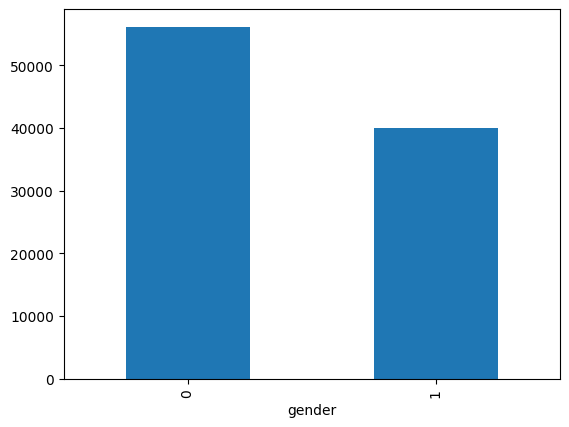

In [ ]:
df["gender"].value_counts().plot.bar()

<Axes: xlabel='heart_disease'>

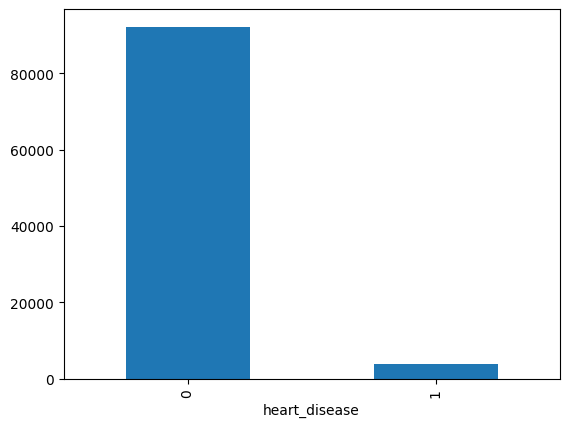

In [ ]:
df["heart_disease"].value_counts().plot.bar()

<Axes: xlabel='smoking_history'>

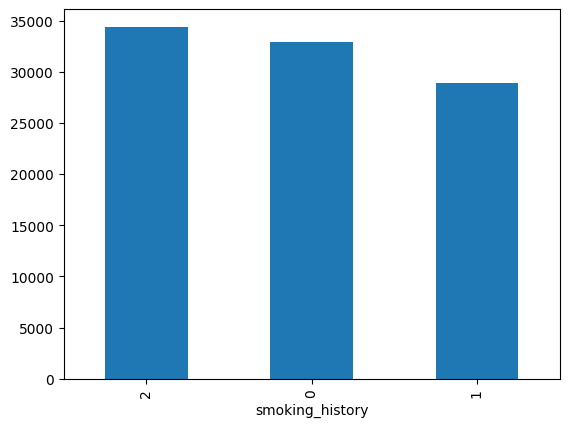

In [ ]:
df["smoking_history"].value_counts().plot.bar()

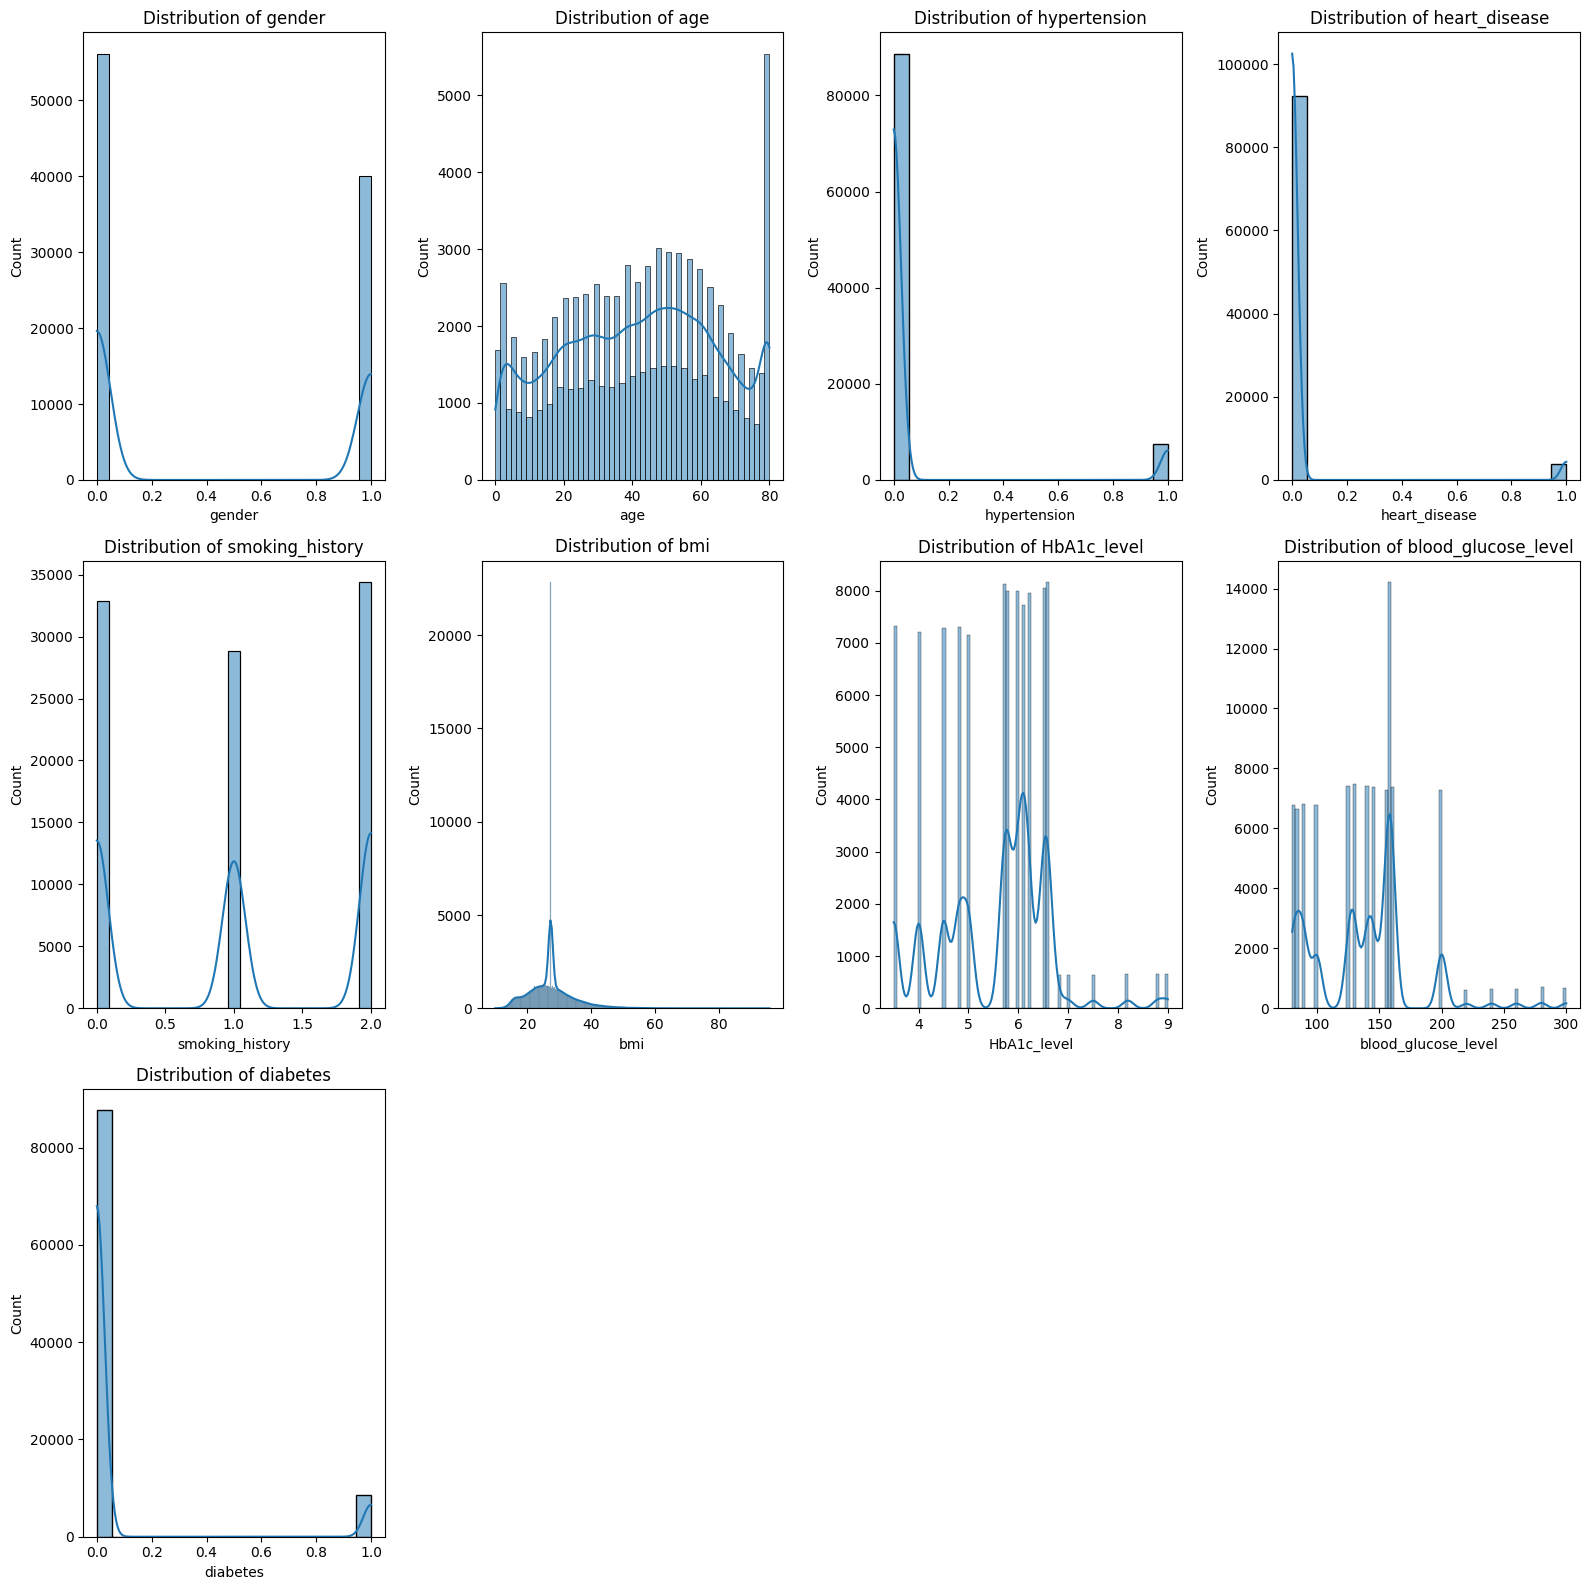

In [ ]:
df_width= len(df.columns)
rows = (df_width +3)//4
plt.figure(figsize=(16,16))

for idx, col in enumerate(df.columns):
  plt.subplot(rows, 4, idx+1)
  sns.histplot(df[col], kde=True)
  plt.title(f"Distribution of {col}")
  plt.tight_layout()
  plt.plot()

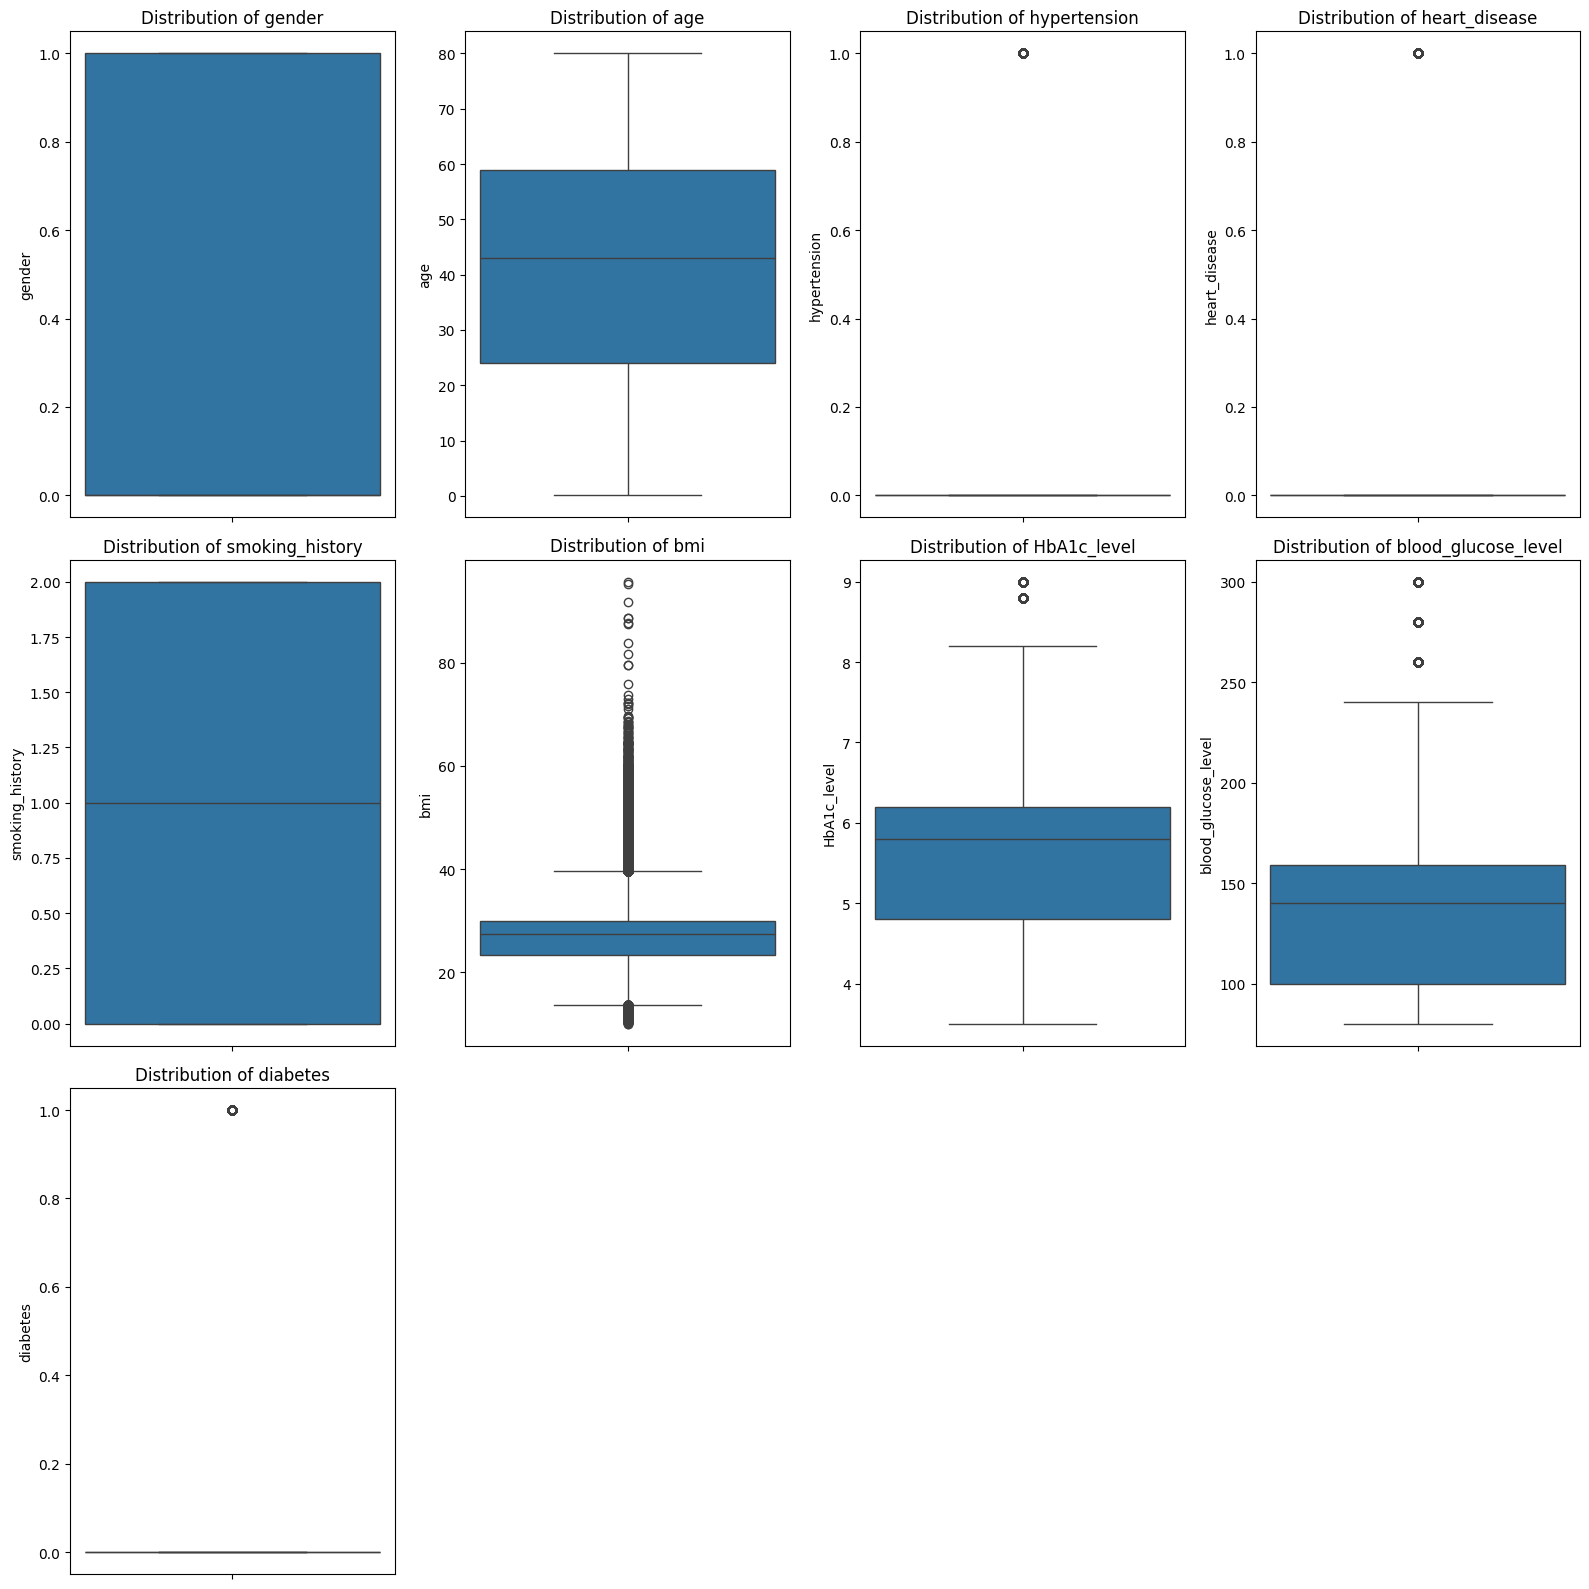

In [ ]:
df_width= len(df.columns)
rows = (df_width +3)//4
plt.figure(figsize=(16,16))

for idx, col in enumerate(df.columns):
  plt.subplot(rows, 4, idx+1)
  sns.boxplot(df[col])
  plt.title(f"Distribution of {col}")
  plt.tight_layout()
  plt.plot()

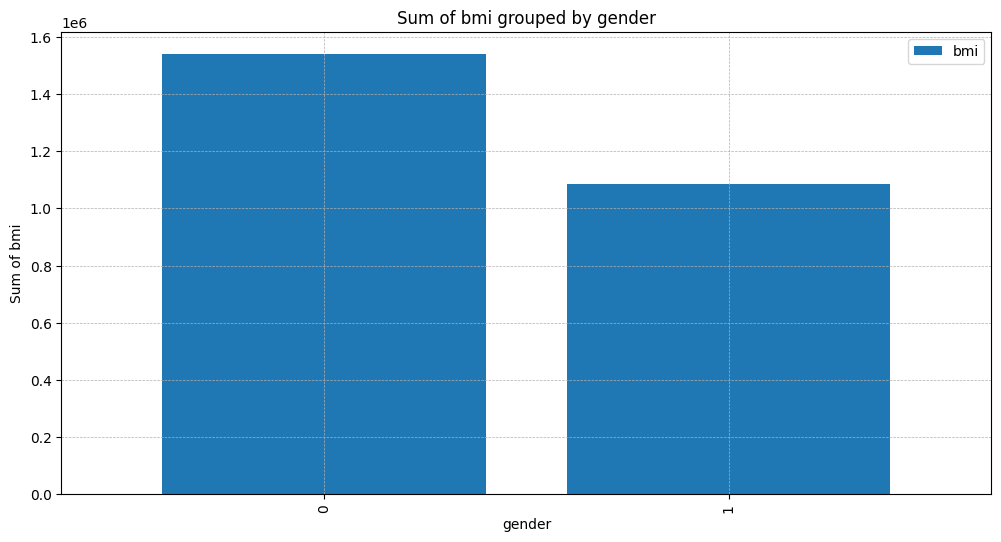

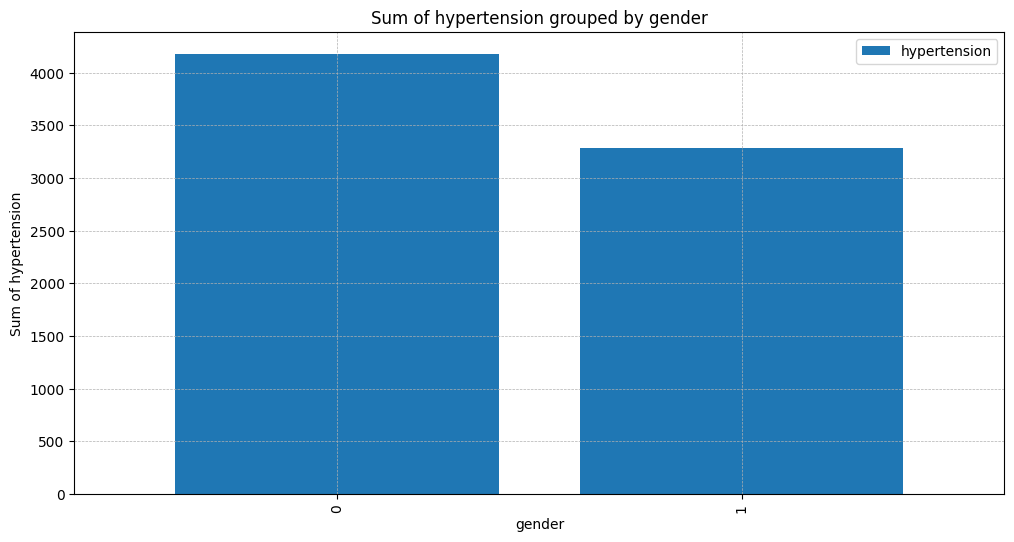

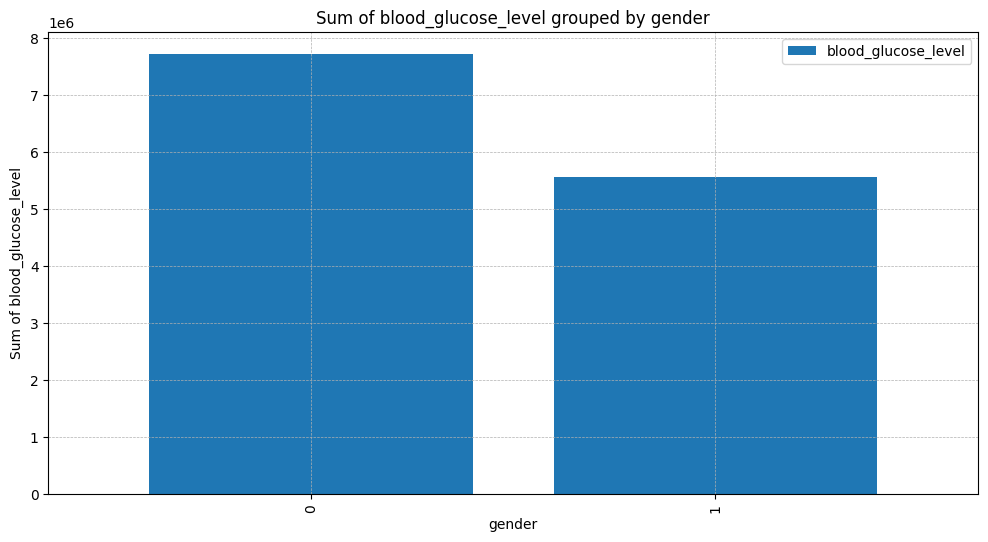

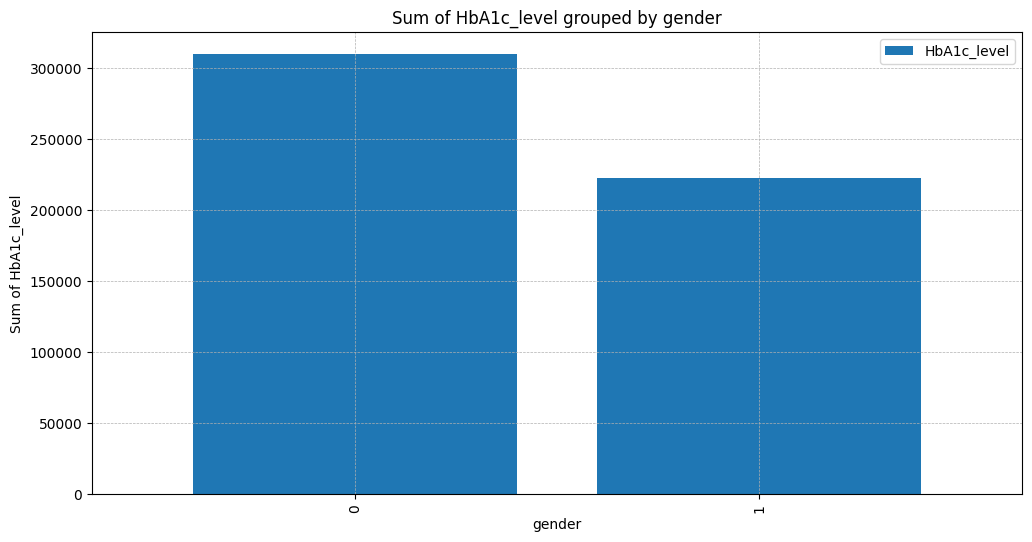

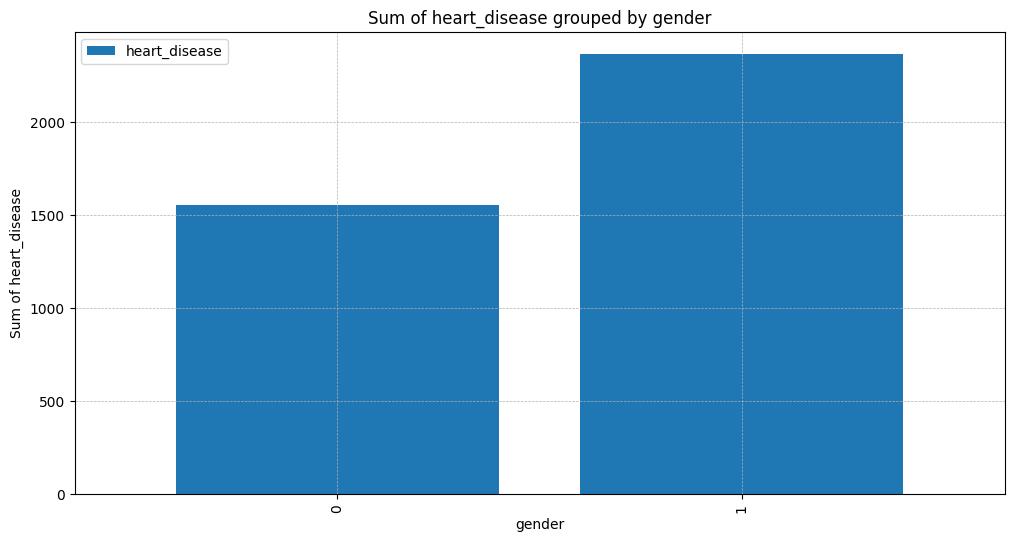

In [ ]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

interested_columns = ["bmi", "hypertension", "blood_glucose_level", "HbA1c_level", "heart_disease"]

for col in interested_columns:
    df_grouped = df.groupby("gender")[col].sum().reset_index()

    df_grouped.plot(kind="bar", x="gender", y=col, width=0.8)

    plt.xlabel("gender")
    plt.ylabel(f"Sum of {col}")
    plt.title(f"Sum of {col} grouped by gender")

    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.show()


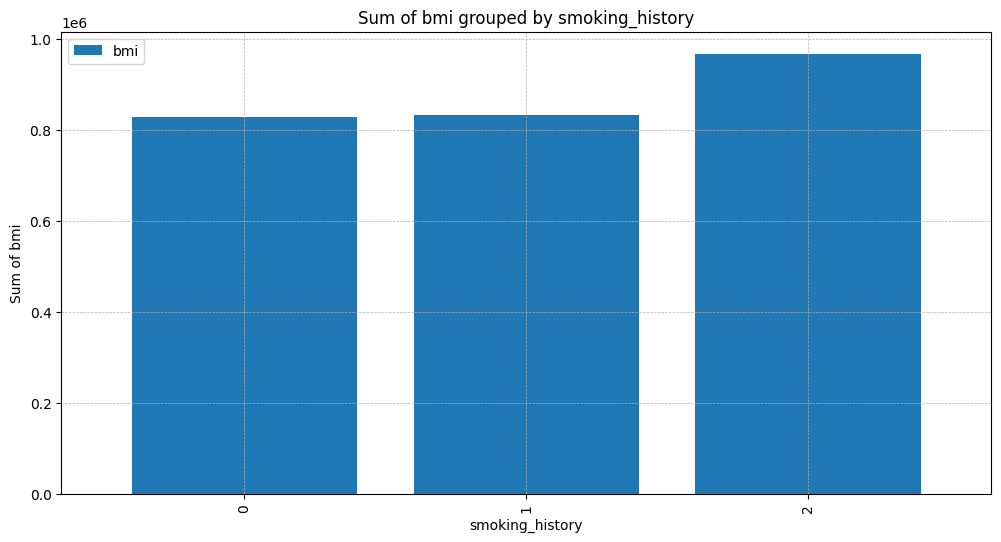

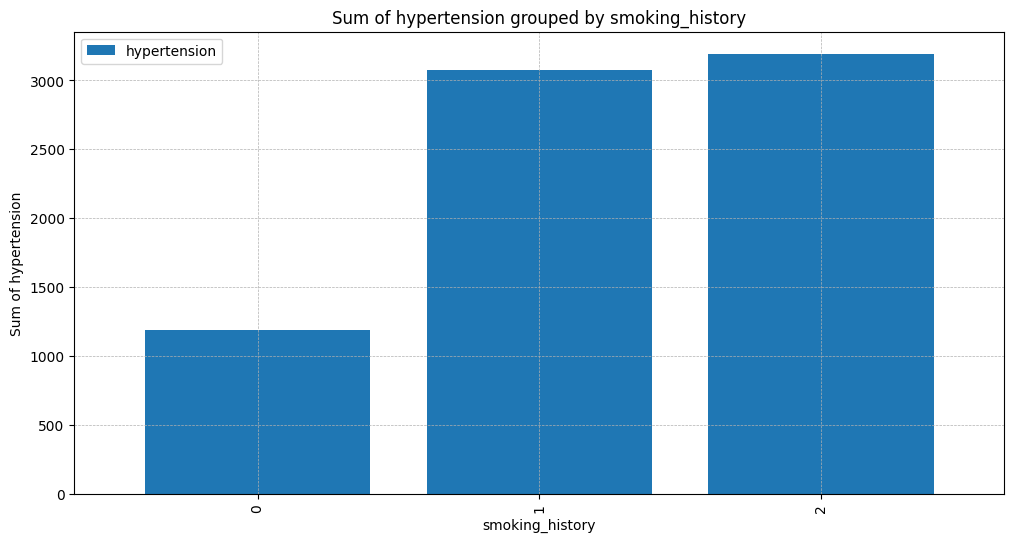

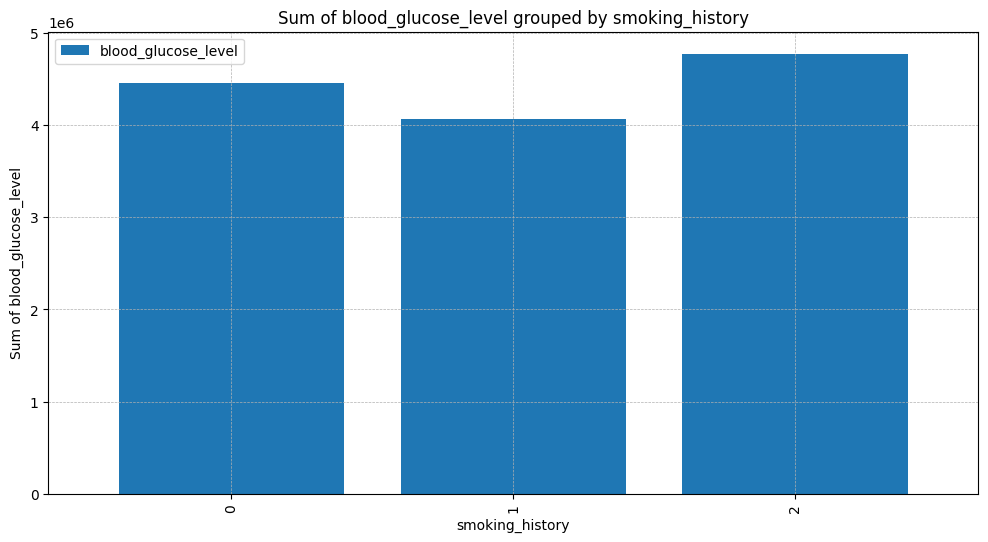

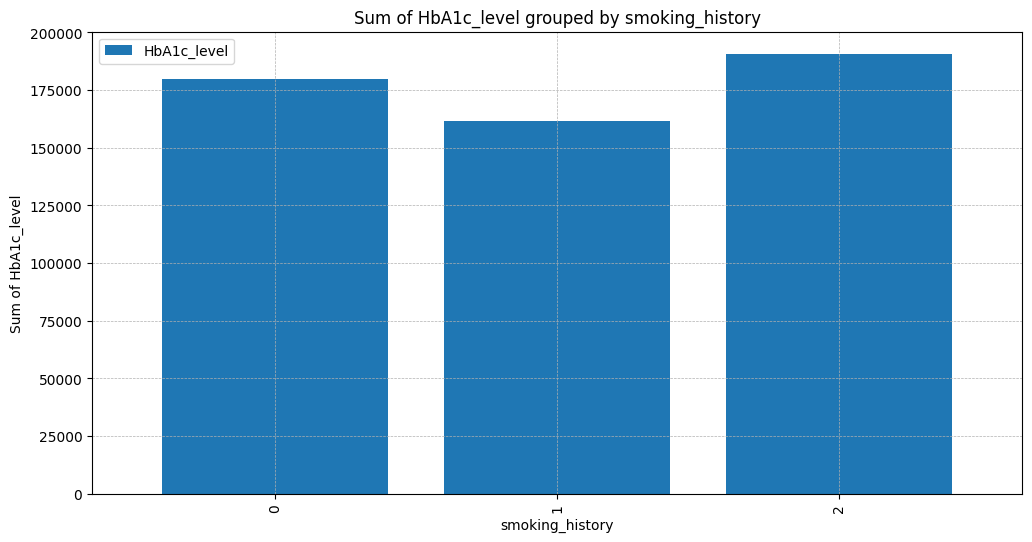

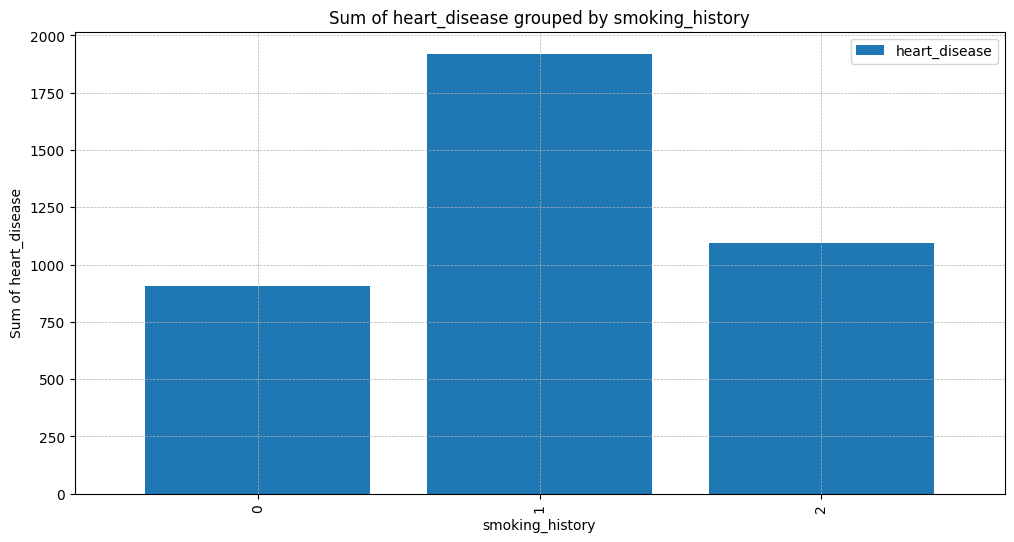

In [ ]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

interested_columns = ["bmi", "hypertension", "blood_glucose_level", "HbA1c_level", "heart_disease"]

for col in interested_columns:
    df_grouped = df.groupby("smoking_history")[col].sum().reset_index()

    df_grouped.plot(kind="bar", x="smoking_history", y=col, width=0.8)

    plt.xlabel("smoking_history")
    plt.ylabel(f"Sum of {col}")
    plt.title(f"Sum of {col} grouped by smoking_history")

    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.show()

<Axes: >

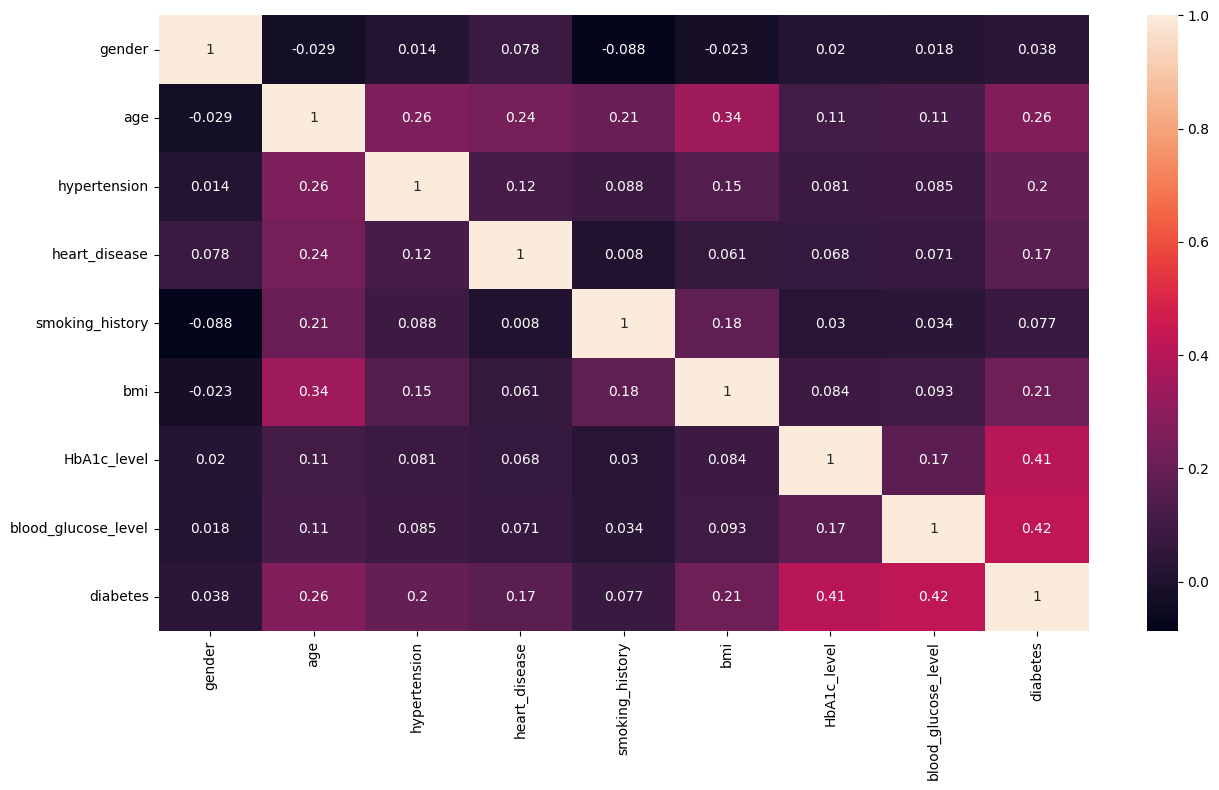

In [ ]:
relations = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(data=relations, annot=True)

<Axes: xlabel='diabetes', ylabel='blood_glucose_level'>

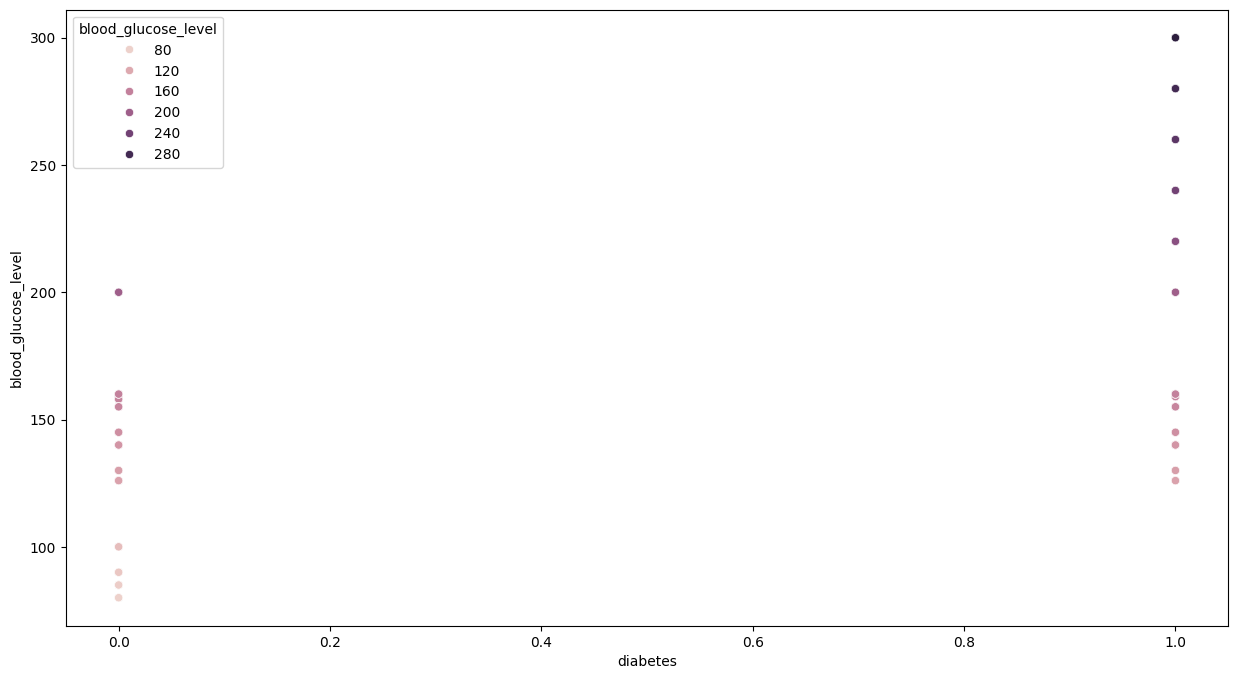

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x="diabetes", y="blood_glucose_level", hue="blood_glucose_level")

<Axes: xlabel='diabetes', ylabel='HbA1c_level'>

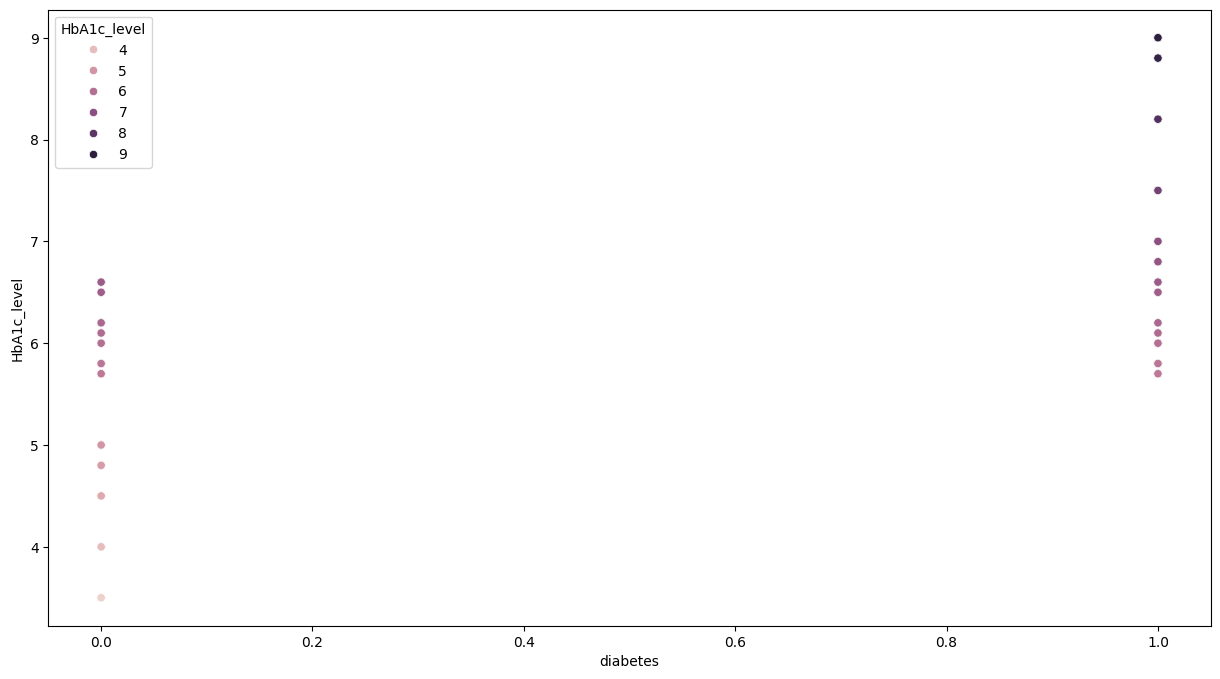

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x="diabetes", y="HbA1c_level", hue="HbA1c_level")

In [ ]:
from sklearn.metrics import fbeta_score


def f2_measure(y_true, y_pred):
  return fbeta_score(y_true, y_pred, beta=2)

def evaluate_model(X, y, model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

  metric = make_scorer(f2_measure)
  scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
  return scores

last_ix = len(df.columns)-1
X, y = df.drop(df.columns[last_ix], axis=1), df[df.columns[last_ix]]
print(X.shape, y.shape, Counter(y))
model = DummyClassifier(strategy='constant', constant=1)
scores = evaluate_model(X, y, model)
print('Mean F2: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

(96146, 8) (96146,) Counter({0: 87664, 1: 8482})
Mean F2: 0.326 (0.000)
